# STAT 207 Homework 7 [25 points]

## Deeper Dive into Hypothesis Testing, Confidence Intervals, and Descriptive Analytics

Due: Friday, March 22, end of day (11:59 pm CT)

<hr>

## Imports 

Run the following code cell to import the necessary packages into the file.  You may import additional packages, as needed for this assignment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Case Study: County Housing Information

The provided **county.csv** file contains various statistics about the population of every county in the United States.  You can read more about this dataset and its variables here:

https://www.openintro.org/data/index.php?data=county

Observational Unit: Each row contains data recorded for a county

Variables: We will focus on the `multi_unit` variable in the data, which reports the percent of housing units in each county that are in multi-unit structures (e.g. apartments).

Below, we read in the data as `df` for later analysis.

In [2]:
df = pd.read_csv('county.csv')
df.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671,54571,55504,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.7,55317,none
1,Baldwin County,Alabama,140415,182265,212628,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562,none
2,Barbour County,Alabama,29038,27457,25270,-6.22,27.2,68.0,11.1,5.9,no,hs_diploma,17891.73,33368,partial
3,Bibb County,Alabama,20826,22915,22668,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404,none
4,Blount County,Alabama,51024,57322,58013,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412,none


In [3]:
df.shape

(3142, 15)

In [4]:
df['state'].nunique()

51

## 1. Deeper Dive Into p-Values and Significance Levels [3 points] 

**a)** We will start by creating a sampling distribution of the mean multi-unit housing rate for 5 randomly selected counties.  Record 5000 repetitions in your simulated sampling distribution.

In [5]:
df['multi_unit'].mean()

12.321896880967534

In [6]:
df['multi_unit'].describe()

count    3142.000000
mean       12.321897
std         9.290205
min         0.000000
25%         6.100000
50%         9.700000
75%        15.900000
max        98.500000
Name: multi_unit, dtype: float64

In [7]:
df.sample(5, replace = True)['multi_unit'].mean()

9.52

In [8]:
df_samp_dist1 = []
for i in range(5000):
    mean_mult_unit = df.sample(5, replace = True)['multi_unit'].mean()
    d = {'mean_mult_unit' : mean_mult_unit}
    df_samp_dist1.append(d)

In [9]:
df_samp_dist1 = pd.DataFrame(df_samp_dist1)
df_samp_dist1.describe()

,mean_mult_unit
count,5000.000000
mean,12.384640
std,4.121914
min,3.100000
25%,9.440000
50%,11.840000
75%,14.720000
max,35.220000


array([[<Axes: title={'center': 'mean_mult_unit'}>]], dtype=object)

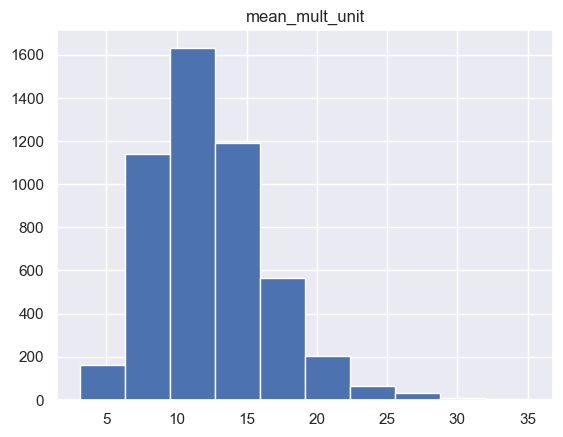

In [10]:
df_samp_dist1.hist()

**b)** Now, we will use the following hypotheses as the framework for our next parts:

$H_0: \mu = 12.32$

$H_a: \mu > 12.32$

We will take 500 repeated random samples of size 5 from the population of counties.  For each of these repeated random samples, calculate the corresponding p-value for the above hypotheses using the sampling distribution from **part a**.  Save the p-value for future analyses.

In [11]:
df_samp_dist1.describe()

,mean_mult_unit
count,5000.000000
mean,12.384640
std,4.121914
min,3.100000
25%,9.440000
50%,11.840000
75%,14.720000
max,35.220000


In [12]:
sim_pval = []
for i in range(500):
    sample_mean = df['multi_unit'].sample(5, replace = True).mean()
    p_val = (df_samp_dist1 > sample_mean).mean().iloc[0]
    d = {"p_val" : p_val}
    sim_pval.append(d)

In [13]:
sim_pval = pd.DataFrame(sim_pval)
sim_pval

,p_val
0,0.1620
1,0.1916
2,0.2114
3,0.1000
4,0.5266
...,...
495,0.6868
496,0.6574
497,0.3862
498,0.1570


array([[<Axes: title={'center': 'p_val'}>]], dtype=object)

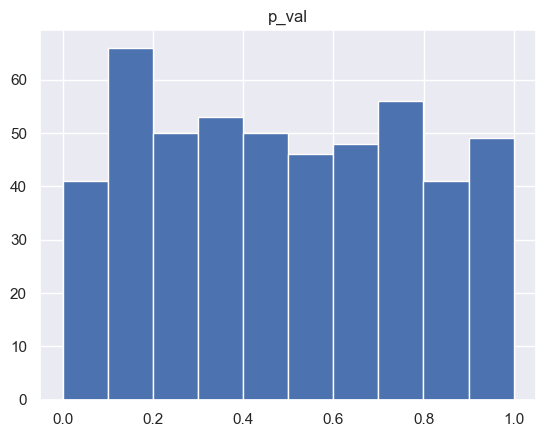

In [14]:
sim_pval.hist()

In [15]:
sim_pval.describe()

,p_val
count,500.000000
mean,0.489309
std,0.285850
min,0.000200
25%,0.234650
50%,0.476400
75%,0.728000
max,0.999400


In [16]:
(sim_pval < 0.05).mean()

p_val    0.054
dtype: float64

In [17]:
(sim_pval < 0.2).mean()

p_val    0.214
dtype: float64

In [18]:
(sim_pval < 0.5).mean()

p_val    0.52
dtype: float64

**c)** Finally, suppose that we consider Champaign and its four neighboring counties (Vermilion, Ford, Piatt, and Douglas) as a sample of counties from the US.  First, calculate the sample mean multi-unit rate of these five counties from Illinois.  Then, using your simulated sampling distribution, calculate the p-value based on these five counties.

**Tip**: You may want to review Homework 5.  We can use the **`&`** ("and") operator to indicate that we want **both** conditions on either side of the operator to be met.  We can use the `**|**` ("or") operator to indicate that we want **at least one** of the conditions to be met.  We can also chain these operators together if we need to represent more complex operations.

In [19]:
df_counties = df[ (df.state == "Illinois") & ((df.name == "Champaign County") | (df.name == "Vermilion County") | (df.name == "Ford County") | (df.name == "Piatt County") | (df.name == "Douglas County"))]
df_counties

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
604,Champaign County,Illinois,179669,201081,209399,1.83,21.4,55.9,35.2,4.24,yes,some_college,29619.49,49586,data unavailable
615,Douglas County,Illinois,19922,19980,19748,-0.57,12.1,78.3,11.2,4.01,no,hs_diploma,25796.91,52261,partial
621,Ford County,Illinois,14241,14081,13280,-2.86,15.7,79.1,7.9,4.7,yes,some_college,27234.78,50851,none
668,Piatt County,Illinois,16365,16729,16445,0.09,5.4,81.7,7.5,3.99,yes,some_college,33598.78,67360,data unavailable
686,Vermilion County,Illinois,83919,81625,77909,-3.31,19.8,71.3,14.5,6.29,yes,hs_diploma,23759.02,44930,data unavailable


In [20]:
df_counties['multi_unit'].mean()

15.260000000000002

In [21]:
(df_samp_dist1 > 15.26).mean().iloc[0]

0.2132

## Case Study: Kitchen Prep Time

The `food_prep.csv` file contains information about how much time a sample of American adults spent preparing food and drink (in minutes) in the last 24 hours.  The data has already been cleaned, so you don't need to worry about cleaning the data before analyzing it.

## 2. A Confidence Interval [1 points]

Read in the `food_prep.csv` file.  Then, generate a sampling distribution for the **median** time spent preparing food and drink by all American adults.  Finally, find the 90% confidence interval using your sampling distribution.

In [22]:
df_food = pd.read_csv("food_prep.csv")
df_food.head()

,food_prep
0,15
1,2
2,60
3,45
4,0


In [23]:
df_food.median().iloc[0]

15.0

In [24]:
df_food.shape

(400, 1)

In [25]:
food_samp_dist = []
for i in range(5000):
    median_time = df_food.sample(400, replace = True).median()
    d = {'median_time' : median_time}
    food_samp_dist.append(d)

In [ ]:
food_samp_dist = pd.DataFrame(food_samp_dist)
food_samp_dist.describe()

In [ ]:
food_samp_dist.head()

In [ ]:
food_samp_dist.hist()

In [ ]:
print(f"Lower Bound: {np.quantile(food_samp_dist, .05)}")
print(f"Upper Bound: {np.quantile(food_samp_dist, .95)}")

In [ ]:
df_food.median().iloc[0]

In [ ]:
sns.violinplot(data = df_food)

## Case Study: Who Dislikes Superbowl Ads?

We'll return to the dataset using Superbowl ads that we previously explored in Homework 4.  Below, the data is prepared and read in for you.  Note: we'll use the log of the dislike count for this question (both GitHub and Gradescope).

In [ ]:
df_superbowl = pd.read_csv('superbowl_ads.csv')
df_superbowl['log_dislike'] = np.log(df_superbowl['dislike_count'] + 1)

In [ ]:
df_superbowl.head()

## 3. Descriptive Analytics [1 point]

Generate one set of numerical summaries for the log of the dislike count of Superbowl ads based on whether the ad includes an animal and whether the ad is funny.  Do so in one line of code for full credit.

In [ ]:
df_superbowl.columns

In [ ]:
df_superbowl[['log_dislike', 'animals', 'funny']].groupby(['animals', 'funny']).describe().reset_index()

In [ ]:
sns.boxplot(x = 'animals', y = 'log_dislike', hue = 'use_sex', data = df_superbowl)

In [ ]:
sns.boxplot(x = 'animals', y = 'log_dislike', data = df_superbowl)

In [ ]:
sns.boxplot(x = 'funny', y = 'log_dislike', hue = 'animals', data = df_superbowl)

Remember to keep all your cells and hit the save icon above periodically to checkpoint (save) your results on your local computer. Once you are satisified with your results restart the kernel and run all (Kernel -> Restart & Run All). **Make sure nothing has changed**. Checkpoint and exit (File -> Save and Checkpoint + File -> Close and Halt). Follow the instructions on the Homework 7 Canvas Assignment to submit your notebook to GitHub.